In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Read in the Dataset, creat dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
#Duplicates? 

data_duplicates = df.duplicated()
print ('Duplicated rows = {}'.format(data_duplicates.sum()))

Duplicated rows = 0


In [15]:
df = df.drop(['PatientId','ScheduledDay','SMS_received','AppointmentID','AppointmentDay'], axis=1)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


In [16]:
# missing values?
df.isnull().sum()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
No-show          0
dtype: int64

In [17]:
# negative age?
df[df.Age < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
99832,F,-1,ROMÃO,0,0,0,0,0,No


In [18]:
#remove all negative
df['Age'] = df['Age'].abs()

In [19]:
#check if removed
df[df.Age < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show


In [20]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248
std,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [21]:
label_encoder=preprocessing.LabelEncoder()
df['No-show']=label_encoder.fit_transform(df['No-show'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Neighbourhood']=label_encoder.fit_transform(df['Neighbourhood'])



In [22]:
#Creating Features array
X = df.iloc[:,0:8]

In [23]:
#creating output array
Y=df.iloc[:,8]


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3, random_state=0)
X_test.shape

(33159, 8)

Logestic Regression


In [25]:
classifier = LogisticRegression(solver='lbfgs',random_state=0,C=2, max_iter=2000 )

In [26]:
#feeding data into the classifier
classifier.fit(X_train, Y_train)


LogisticRegression(C=2, max_iter=2000, random_state=0)

In [27]:
predicted_y = classifier.predict(X_test)

In [28]:
#for x in range(len(predicted_y)):
  # if (predicted_y[x] == 1):
    #  print(x, end="\t")

print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))


Accuracy: 0.80


Artifitial Neural Network (ANN):


In [19]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [20]:
#print(X_train[:,0])

In [21]:
#initialization
classifier = Sequential()

#Adding the input layer and a hidden layer
classifier.add(Dense( 5, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 8))

#Adding second hidden layer
classifier.add(Dense(5, kernel_initializer = 'glorot_uniform', activation = 'relu'))

#Adding output layer
classifier.add(Dense(1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

In [22]:
#Compiling the artificial neural network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
metrics = ['accuracy'])

In [23]:
#Fitting artifical neural network to the training set
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 10)

Epoch 1/10
7737/7737 [==============================] - 22s 3ms/step - loss: 0.5090 - accuracy: 0.7940
Epoch 2/10
7737/7737 [==============================] - 28s 4ms/step - loss: 0.5021 - accuracy: 0.7967
Epoch 3/10
7737/7737 [==============================] - 24s 3ms/step - loss: 0.5018 - accuracy: 0.7967
Epoch 4/10
7737/7737 [==============================] - 25s 3ms/step - loss: 0.5016 - accuracy: 0.7967
Epoch 5/10
7737/7737 [==============================] - 23s 3ms/step - loss: 0.5014 - accuracy: 0.7967
Epoch 6/10
7737/7737 [==============================] - 24s 3ms/step - loss: 0.5015 - accuracy: 0.7967
Epoch 7/10
7737/7737 [==============================] - 30s 4ms/step - loss: 0.5013 - accuracy: 0.7967
Epoch 8/10
7737/7737 [==============================] - 25s 3ms/step - loss: 0.5012 - accuracy: 0.7967
Epoch 9/10
7737/7737 [==============================] - 22s 3ms/step - loss: 0.5012 - accuracy: 0.7967
Epoch 10/10
7737/7737 [==============================] - 24s 3ms/step - l

In [24]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
#Converting probabilities into a binary result
Y_pred = (Y_pred > 0.5)
Y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [11]:
print(classification_report(Y_pred,Y_test))

NameError: name 'classification_report' is not defined

k-nearest neighbors algorithm (KNN):


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:

k_range = range(1, 25)

scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

print(scores)


print ("List index-value are : ")
for i in range(len(scores)):
    print (i+1, end = " ")
    print (scores[i])

[0.6952260321481347, 0.7800597122953045, 0.7463735335806266, 0.7853674718779216, 0.7689013540818481, 0.7898006574384029, 0.7790645073735637, 0.7918513827316868, 0.7852166832534153, 0.7964655146415754, 0.7926053258542176, 0.7970385114146988, 0.7950782592961188, 0.7981543472360445, 0.7962242528423655, 0.7988781326336741, 0.7974004041135137, 0.7994209716818963, 0.798094031786242, 0.8002653879791308, 0.7990892367079827, 0.8006574384028469, 0.800024126179921, 0.8009590156518592]
List index-value are : 
1 0.6952260321481347
2 0.7800597122953045
3 0.7463735335806266
4 0.7853674718779216
5 0.7689013540818481
6 0.7898006574384029
7 0.7790645073735637
8 0.7918513827316868
9 0.7852166832534153
10 0.7964655146415754
11 0.7926053258542176
12 0.7970385114146988
13 0.7950782592961188
14 0.7981543472360445
15 0.7962242528423655
16 0.7988781326336741
17 0.7974004041135137
18 0.7994209716818963
19 0.798094031786242
20 0.8002653879791308
21 0.7990892367079827
22 0.8006574384028469
23 0.800024126179921
24

Text(0, 0.5, 'Testing Accuracy')

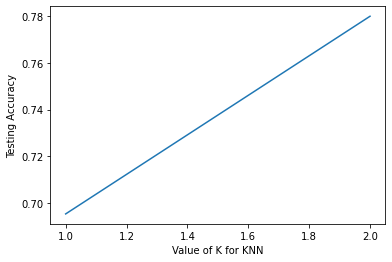

In [78]:
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [50]:
KNN= KNeighborsClassifier(n_neighbors=15)

In [51]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [52]:
Y_predict = KNN.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print (classification_report(Y_predict,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     32708
           1       0.02      0.31      0.04       451

    accuracy                           0.80     33159
   macro avg       0.50      0.56      0.46     33159
weighted avg       0.98      0.80      0.87     33159



Naive bayes Gaussian Classifier:

In [32]:
gnb = GaussianNB()

In [33]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [34]:
y_pred = gnb.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [35]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.792273590880304


In [36]:
cm=np.array(confusion_matrix(Y_test,y_pred))

cm

array([[26138,   433],
       [ 6455,   133]], dtype=int64)

In [37]:
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     26571
           1       0.23      0.02      0.04      6588

    accuracy                           0.79     33159
   macro avg       0.52      0.50      0.46     33159
weighted avg       0.69      0.79      0.72     33159



In [38]:
from sklearn.svm import SVC

In [39]:
svclassifier = SVC(kernel='linear')

In [40]:
svclassifier.fit(X_train, Y_train)

In [ ]:
Y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,Y_pred))

[[26571     0]
 [ 6588     0]]


In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26571
           1       0.00      0.00      0.00      6588

    accuracy                           0.80     33159
   macro avg       0.40      0.50      0.44     33159
weighted avg       0.64      0.80      0.71     33159



C:\Program Files\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
